# Voltage Quality Classification Model
 The quality of power supplied to end-use equipments depends upon the quality of voltage supplied by utility. Voltage is said to have quality if it has rated value at rated frequency without any distortion from sine wave. The normal voltage quality issues are:
- Voltage Sag
- Voltage Swell
- Voltage Flicker
- Voltage Harmonics
- Voltage Interruption

Classification of voltage quality is a must for activating corresponding controllers to mitigate the issues using compensating device. Training data is generated by using functions which simulate the above power quality issues.

# Installing the required packages

In [1]:
!pip install xgboost

# Importing the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Loading the data into the dataframe

In [3]:
data = pd.read_csv("Voltage Quality.csv")
test = pd.read_csv("Voltage Quality Test.csv")
data.head()

,Sample,Voltage,Problem
0,1,56.46,Normal
1,2,111.20,Normal
2,3,162.57,Normal
3,4,209.00,Normal
4,5,249.09,Normal


In [4]:
test.head()

,Sample,Voltage,Problem
0,1,56.46,Normal
1,2,111.20,Normal
2,3,162.57,Normal
3,4,209.00,Normal
4,5,249.09,Normal


# Total number of rows and columns

In [5]:
data.shape # 3366 rows and 3 columns

(3366, 3)

In [6]:
test.shape

(1020, 3)

# Checking the type of data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3366 entries, 0 to 3365
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sample   3366 non-null   int64  
 1   Voltage  3366 non-null   float64
 2   Problem  3366 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 79.0+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sample   1020 non-null   int64  
 1   Voltage  1020 non-null   float64
 2   Problem  1020 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 24.0+ KB


# Checking for missing values

In [9]:
data.isnull().sum() # No missing values

Sample     0
Voltage    0
Problem    0
dtype: int64

In [10]:
test.isnull().sum()

Sample     0
Voltage    0
Problem    0
dtype: int64

# Checking for duplicates

In [11]:
data.duplicated().sum() # 510 duplicates

510

In [12]:
test.duplicated().sum()

136

# Finding the unique values in problem column

In [13]:
data.Problem.unique() # 6 unique values

array(['Normal', 'Sag', 'Swell', 'Flicker', 'Interruption', 'Harmonics'],
      dtype=object)

In [14]:
test.Problem.unique()

array(['Normal', 'Sag', 'Swell', 'Flicker', 'Interruption', 'Harmonics'],
      dtype=object)

In [15]:
data.head()

,Sample,Voltage,Problem
0,1,56.46,Normal
1,2,111.20,Normal
2,3,162.57,Normal
3,4,209.00,Normal
4,5,249.09,Normal


# Analysing statistical data

In [16]:
data.describe(include="all")

,Sample,Voltage,Problem
count,3366.000000,3366.000000,3366
unique,NaN,NaN,6
top,NaN,NaN,Harmonics
freq,NaN,NaN,578
mean,17.500000,0.000226,NaN
std,9.812166,229.620084,NaN
min,1.000000,-585.480000,NaN
25%,9.000000,-208.957500,NaN
50%,17.500000,0.000000,NaN
75%,26.000000,209.255000,NaN


# Finding outliers

In [17]:
# Function to find the outliers
def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers)  

In [18]:
len(findoutliers(data.Voltage)) # Non of the rows have outliers

0

In [19]:
len(findoutliers(data.Sample)) # Non of the rows have outliers

0

# Data visualisation

Text(0.5, 1.0, 'Distribution plot of Voltage')

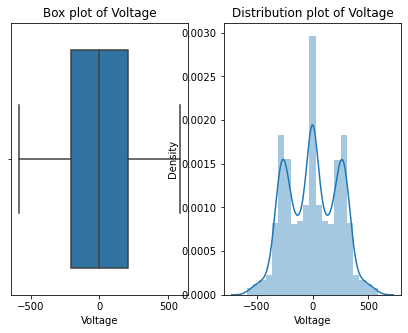

In [20]:
# Voltage
fix, (ax1,ax2) =plt.subplots(1,2,figsize=(7,5))
sn.boxplot(data.Voltage, orient='v',ax=ax1)
ax1.set_ylabel=data.Voltage.name
ax1.set_title('Box plot of {}'.format(data.Voltage.name))
sn.distplot(data.Voltage,ax=ax2) 
ax2.set_title('Distribution plot of {}'.format(data.Voltage.name))

In [21]:
# Problem
data.Problem.value_counts()

Harmonics       578
Swell           578
Sag             578
Normal          578
Flicker         544
Interruption    510
Name: Problem, dtype: int64

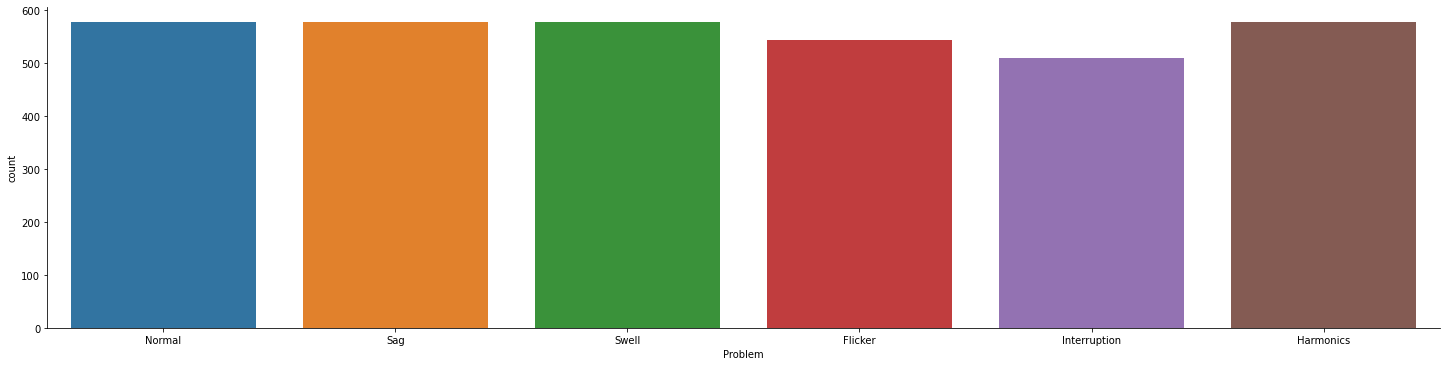

In [22]:
pl = sn.factorplot('Problem',data=data, aspect=4,kind='count')
pl.set_xticklabels()

# Identifying the independent and dependent variables

In [23]:
X = data.iloc[:,:-1] # Independent variable
y = data.Problem # Dependent variable

In [24]:
x_test = test.iloc[:,:-1]
y_test = test.Problem 

# Decision Tree

# Defining the model

In [25]:
model_dt = DecisionTreeClassifier()

# Training the model

In [26]:
model_dt.fit(X,y)

DecisionTreeClassifier()

# Testing the model

In [27]:
y_predict_dt = model_dt.predict(x_test)
as_dt = accuracy_score(y_test,y_predict_dt)
as_dt

0.95

In [28]:
print(classification_report(y_test,y_predict_dt))

              precision    recall  f1-score   support

     Flicker       0.92      1.00      0.96       170
   Harmonics       0.91      0.85      0.88       170
Interruption       1.00      1.00      1.00       170
      Normal       0.95      1.00      0.97       170
         Sag       0.98      0.92      0.95       170
       Swell       0.95      0.92      0.93       170

    accuracy                           0.95      1020
   macro avg       0.95      0.95      0.95      1020
weighted avg       0.95      0.95      0.95      1020



In [29]:
confusion_matrix(y_test,y_predict_dt)

array([[170,   0,   0,   0,   0,   0],
       [  7, 145,   0,   5,   4,   9],
       [  0,   0, 170,   0,   0,   0],
       [  0,   0,   0, 170,   0,   0],
       [  3,  10,   0,   0, 157,   0],
       [  4,   5,   0,   4,   0, 157]])

# XGBoost

# Defining the model

In [30]:
model_xgb = XGBClassifier(n_estimators=300)

# Training the model

In [31]:
model_xgb.fit(X,y)

[21:26:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Testing the model

In [32]:
y_predict_xgb = model_dt.predict(x_test)
as_xgb = accuracy_score(y_test,y_predict_xgb)
as_xgb

0.95

In [33]:
print(classification_report(y_test,y_predict_xgb))

              precision    recall  f1-score   support

     Flicker       0.92      1.00      0.96       170
   Harmonics       0.91      0.85      0.88       170
Interruption       1.00      1.00      1.00       170
      Normal       0.95      1.00      0.97       170
         Sag       0.98      0.92      0.95       170
       Swell       0.95      0.92      0.93       170

    accuracy                           0.95      1020
   macro avg       0.95      0.95      0.95      1020
weighted avg       0.95      0.95      0.95      1020



In [34]:
confusion_matrix(y_test,y_predict_xgb)

array([[170,   0,   0,   0,   0,   0],
       [  7, 145,   0,   5,   4,   9],
       [  0,   0, 170,   0,   0,   0],
       [  0,   0,   0, 170,   0,   0],
       [  3,  10,   0,   0, 157,   0],
       [  4,   5,   0,   4,   0, 157]])

# Random Forest

# Defining the model

In [35]:
model_rf = RandomForestClassifier()

# Training the model

In [36]:
model_rf.fit(X,y)

RandomForestClassifier()

# Testing the model

In [37]:
y_predict_rf = model_rf.predict(x_test)
as_rf = accuracy_score(y_test,y_predict_rf)
as_rf

0.9774509803921568

In [38]:
print(classification_report(y_test,y_predict_rf))

              precision    recall  f1-score   support

     Flicker       0.97      1.00      0.99       170
   Harmonics       0.94      0.92      0.93       170
Interruption       1.00      1.00      1.00       170
      Normal       1.00      1.00      1.00       170
         Sag       0.98      0.96      0.97       170
       Swell       0.97      0.98      0.97       170

    accuracy                           0.98      1020
   macro avg       0.98      0.98      0.98      1020
weighted avg       0.98      0.98      0.98      1020



In [39]:
confusion_matrix(y_test,y_predict_rf)

array([[170,   0,   0,   0,   0,   0],
       [  5, 157,   0,   0,   3,   5],
       [  0,   0, 170,   0,   0,   0],
       [  0,   0,   0, 170,   0,   0],
       [  0,   6,   0,   0, 164,   0],
       [  0,   4,   0,   0,   0, 166]])

# Model Evaluation

In [40]:
Accuracy_Score = [as_dt,as_rf,as_xgb]
Models = ['Decision Tree', 'Random Forest','XG Boost']

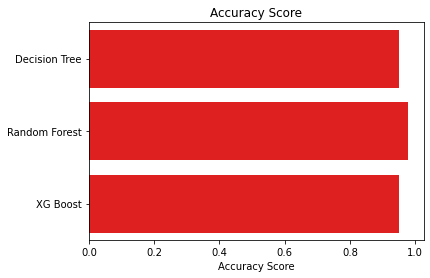

In [41]:
sn.barplot(Accuracy_Score, Models, color="r")
plt.xlabel('Accuracy Score')
plt.title('Accuracy Score')
plt.show()

Random Forest seems to have the highest accuracy score hence we go ahead with Random Forest algorithm.

# Hyperparameter (using grid search)

In [42]:
parameters = {'max_depth':[10,15,14,13,12],
              'random_state': [4,5,6,7],
              'n_estimators':[150,160,170,180,190,200]}

grid = GridSearchCV(model_rf,parameters,cv=5,verbose=1)
grid.fit(X,y)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 15, 14, 13, 12],
                         'n_estimators': [150, 160, 170, 180, 190, 200],
                         'random_state': [4, 5, 6, 7]},
             verbose=1)

In [43]:
grid.best_score_

0.8773607700142415

In [44]:
grid.best_params_

{'max_depth': 13, 'n_estimators': 190, 'random_state': 5}

# Training Random Forest with best parameters

In [45]:
model_rf = RandomForestClassifier(n_estimators=190,max_depth=13,random_state=5)
model_rf.fit(X,y)

RandomForestClassifier(max_depth=13, n_estimators=190, random_state=5)

# Testing Random Forest with best parameters

In [51]:
y_predict = model_rf.predict(x_test)
accuracy_score(y_test,y_predict)

0.9892156862745098

In [52]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

     Flicker       1.00      1.00      1.00       170
   Harmonics       0.94      1.00      0.97       170
Interruption       1.00      1.00      1.00       170
      Normal       1.00      1.00      1.00       170
         Sag       1.00      0.96      0.98       170
       Swell       1.00      0.98      0.99       170

    accuracy                           0.99      1020
   macro avg       0.99      0.99      0.99      1020
weighted avg       0.99      0.99      0.99      1020



In [53]:
confusion_matrix(y_test,y_predict)

array([[170,   0,   0,   0,   0,   0],
       [  0, 170,   0,   0,   0,   0],
       [  0,   0, 170,   0,   0,   0],
       [  0,   0,   0, 170,   0,   0],
       [  0,   7,   0,   0, 163,   0],
       [  0,   4,   0,   0,   0, 166]])